In [146]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

data = pd.read_excel('Data.xlsx')
csv_data = data.to_csv('salesData.csv', index=False,encoding='utf-8-sig')
df = pd.read_csv('salesData.csv')
df 


,InvoiceID,CompanyRef,CurrencyRef,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,...,ProductRef,Quantity,MajorUnitQuantity,InitialQuantity,PriceBaseFee,Fee,Price,DeliveryAddressRef,SalesArea,RegionalDivision
0,62,1,1,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,...,613,1.0,1.0,1.0,9.500000e+07,9.500000e+07,9.500000e+07,NaN,تک فروشی,بروجرد
1,62,1,1,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,...,613,1.0,1.0,1.0,9.500000e+07,9.500000e+07,9.500000e+07,NaN,تک فروشی,بروجرد
2,64,1,1,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,...,937,4.0,4.0,4.0,4.375000e+09,4.375000e+09,1.750000e+10,NaN,تک فروشی,تهران
3,64,1,1,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,...,937,4.0,4.0,4.0,4.375000e+09,4.375000e+09,1.750000e+10,NaN,تک فروشی,تهران
4,67,1,1,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,...,22545,1.0,1.0,1.0,2.000000e+07,2.000000e+07,2.000000e+07,470.0,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,48931,200.0,200.0,200.0,1.400000e+06,1.400000e+06,2.800000e+08,1960.0,خدمات پس از فروش,تهران
17092,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49314,1.0,1.0,1.0,6.200000e+08,6.200000e+08,6.200000e+08,1960.0,خدمات پس از فروش,تهران
17093,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49314,1.0,1.0,1.0,6.200000e+08,6.200000e+08,6.200000e+08,1960.0,خدمات پس از فروش,تهران
17094,5173,1,1,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,...,49315,1.0,1.0,1.0,2.000000e+07,2.000000e+07,2.000000e+07,1960.0,خدمات پس از فروش,تهران


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17096 entries, 0 to 17095
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               17096 non-null  int64  
 1   CompanyRef              17096 non-null  int64  
 2   CurrencyRef             17096 non-null  int64  
 3   Number                  17096 non-null  int64  
 4   Date                    17096 non-null  object 
 5   CustomerRef             17096 non-null  int64  
 6   BrokerRef               17096 non-null  int64  
 7   Creator                 17096 non-null  int64  
 8   PayerType               17096 non-null  int64  
 9   InvoicePrice            17096 non-null  float64
 10  InvoiceAdditionAmount   17096 non-null  float64
 11  InvoiceReductionAmount  17096 non-null  float64
 12  InvoiceNetPrice         17096 non-null  float64
 13  EffectiveNetPrice       17096 non-null  float64
 14  InvoiceStauts           17096 non-null

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>حذف ستون های نامربوط</strong>
</div>

In [148]:
columns = ['CompanyRef','CurrencyRef','EffectiveNetPrice','MajorUnitQuantity',
           'InitialQuantity','PriceBaseFee','DeliveryAddressRef']
df.drop(columns=columns,inplace=True)
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CanceledDate,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,NaN,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,NaN,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,NaN,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,NaN,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,NaN,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,NaN,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران


In [149]:
df.isna().sum()

InvoiceID                     0
Number                        0
Date                          0
CustomerRef                   0
BrokerRef                     0
Creator                       0
PayerType                     0
InvoicePrice                  0
InvoiceAdditionAmount         0
InvoiceReductionAmount        0
InvoiceNetPrice               0
InvoiceStauts                 0
CanceledDate              16808
CreationDate                  0
InvoiceItemID                 0
InvoiceRef                    0
ProductRef                    0
Quantity                      0
Fee                           0
Price                         0
SalesArea                     0
RegionalDivision              0
dtype: int64

In [150]:
df = df[df['CanceledDate'].isna()]
df = df.drop(columns=['CanceledDate'])
df



,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceStauts,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,Registred by Accounting,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,Registred by Accounting,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,Registred by Accounting,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,Registred by Accounting,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,Registred by Accounting,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,Canceled,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [152]:

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, dtype={df[col].dtype}")

InvoiceID: min=62, max=5173, dtype=int64
Number: min=11171, max=27960, dtype=int64
CustomerRef: min=3, max=94414, dtype=int64
BrokerRef: min=1, max=15, dtype=int64
Creator: min=1, max=9081, dtype=int64
PayerType: min=1, max=3, dtype=int64
InvoicePrice: min=1600000.0, max=2079059364000.0, dtype=float64
InvoiceAdditionAmount: min=160000.0, max=207905936400.0, dtype=float64
InvoiceReductionAmount: min=0.0, max=2370000000.0, dtype=float64
InvoiceNetPrice: min=1760000.0, max=2286965300400.0, dtype=float64
InvoiceItemID: min=191, max=45750, dtype=int64
InvoiceRef: min=62, max=5173, dtype=int64
ProductRef: min=41, max=49319, dtype=int64
Quantity: min=0.7, max=17780.0, dtype=float64
Fee: min=45871.0, max=96636005000.0, dtype=float64
Price: min=312000.0, max=852000000000.0, dtype=float64


In [153]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

lbe = LabelEncoder()
df['SalesAreaNumber'] = lbe.fit_transform(df['SalesArea'])
df 

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1


In [154]:
df['RegionalDivision'] = df['RegionalDivision'].str.strip()  
df['RegionalDivision'] = df['RegionalDivision'].str.replace(r'[^آ-یa-zA-Z0-9\s]', '', regex=True)  
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,CreationDate,InvoiceItemID,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,2022-02-27 16:51:59.880,191,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,2022-03-02 08:23:02.367,196,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,2022-03-02 08:50:21.620,203,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45748,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45749,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,2025-03-11 09:23:08.820,45750,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1


In [155]:
print(df['RegionalDivision'].unique())

['بروجرد' 'تهران' 'مریوان' 'علی آباد کتول' 'کرمان' 'یزد' 'ارومیه' 'یاسوج'
 'اصفهان' 'ایلام' 'بابلسر' 'مشهد' 'قزوین' 'سنندج' 'اراک' 'کرج'
 'استان کرمان' 'قم' 'بندرعباس' 'سمنان' 'همدان' 'زاهدان' 'کیش' 'قشم'
 'مراغه' 'تنکابنشهسوار' 'خوی' 'رشت' 'تبریز' 'زنجان' 'اردبیل' 'گنبد کاووس'
 'شهر کرد' 'شیراز' 'بیرجند' 'بابل' 'بجنورد' 'مرند' 'صفادشت' 'هشتگرد'
 'خرم آباد' 'قائمشهر' 'ورامین' 'شوش دانیال' 'نور' 'مهاباد' 'شهرری'
 'شهریار' 'بندر انزلی' 'دماوند' 'بومهن' 'دورود' 'اهواز' 'استان تهران'
 'بندر لنگه' 'شهر قدس' 'اسلامشهر' 'مرکزی کرج' 'مرکزی رشت' 'گرگان' 'بوشهر'
 'کرج ' 'لنگرود' 'استان بوشهر' 'جاجرود' 'ساوه' 'اندیمشک' 'بهبهان'
 'نظرآباد' 'کرمانشاه' 'آباده' 'شمیرانات' 'مرکزی قم' 'استان خراسان شمالی'
 'ساری' 'خوزستان' 'شوشتر' 'ماهدشت' 'مرکزی اصفهان' 'مازندران' 'مرکزی بوشهر'
 'شاهرود' 'آمل' 'صایین قلعه' 'استان اردبیل' 'پاکدشت' 'زرند' 'دلیجان'
 'خرمدره' 'خرمشهر' 'بروجن' 'سبزوار' 'محمود آباد' 'فسا']


In [156]:
print(df['RegionalDivision'].value_counts())


RegionalDivision
تهران     9063
کرمان      815
یزد        767
اصفهان     595
مشهد       398
          ... 
شاهرود       2
خرمدره       2
دلیجان       2
سبزوار       2
فسا          2
Name: count, Length: 94, dtype: int64


In [157]:
df['RegionalDivisionNumber'] = lbe.fit_transform(df['RegionalDivision'])
df['InvoiceStatusNumber'] = lbe.fit_transform(df['InvoiceStauts'])
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber,RegionalDivisionNumber,InvoiceStatusNumber
0,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0,18,1
1,62,26155,2022-02-06 00:00:00.000,5,1,8959,1,9.500000e+07,8.550000e+06,0.0,...,62,613,1.0,9.500000e+07,9.500000e+07,تک فروشی,بروجرد,0,18,1
2,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0,29,1
3,64,26169,2022-03-02 00:00:00.000,18806,3,8947,1,1.750000e+10,1.575000e+09,0.0,...,64,937,4.0,4.375000e+09,1.750000e+10,تک فروشی,تهران,0,29,1
4,67,26167,2022-02-22 00:00:00.000,13704,3,8947,1,2.000000e+07,1.800000e+06,0.0,...,67,22545,1.0,2.000000e+07,2.000000e+07,تک فروشی,تهران,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,48931,200.0,1.400000e+06,2.800000e+08,خدمات پس از فروش,تهران,1,29,0
17092,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1,29,0
17093,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49314,1.0,6.200000e+08,6.200000e+08,خدمات پس از فروش,تهران,1,29,0
17094,5173,13050,2025-03-11 00:00:00.000,574,1,9081,1,9.200000e+08,9.200000e+07,0.0,...,5173,49315,1.0,2.000000e+07,2.000000e+07,خدمات پس از فروش,تهران,1,29,0


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   InvoiceID               16808 non-null  int64  
 1   Number                  16808 non-null  int64  
 2   Date                    16808 non-null  object 
 3   CustomerRef             16808 non-null  int64  
 4   BrokerRef               16808 non-null  int64  
 5   Creator                 16808 non-null  int64  
 6   PayerType               16808 non-null  int64  
 7   InvoicePrice            16808 non-null  float64
 8   InvoiceAdditionAmount   16808 non-null  float64
 9   InvoiceReductionAmount  16808 non-null  float64
 10  InvoiceNetPrice         16808 non-null  float64
 11  InvoiceStauts           16808 non-null  object 
 12  CreationDate            16808 non-null  object 
 13  InvoiceItemID           16808 non-null  int64  
 14  InvoiceRef              16808 non-null  int

In [159]:
date_columns = ['Date','CreationDate']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')





type_map = {
    np.uint8 : ['BrokerRef','PayerType','RegionalDivisionNumber','SalesAreaNumber','InvoiceStatusNumber'],
    np.uint16 : ['InvoiceID','Number','Creator','InvoiceItemID','InvoiceRef','ProductRef','Quantity'],
    np.uint32 : ['CustomerRef','InvoiceReductionAmount'],
    np.uint64 : ['InvoicePrice','InvoiceAdditionAmount','InvoiceNetPrice','Fee','Price']
}


for dtype,columns in type_map.items():
    for col in columns:
        df[col] = df[col].astype(dtype)
    
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17095
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   InvoiceID               16808 non-null  uint16        
 1   Number                  16808 non-null  uint16        
 2   Date                    16808 non-null  datetime64[ns]
 3   CustomerRef             16808 non-null  uint32        
 4   BrokerRef               16808 non-null  uint8         
 5   Creator                 16808 non-null  uint16        
 6   PayerType               16808 non-null  uint8         
 7   InvoicePrice            16808 non-null  uint64        
 8   InvoiceAdditionAmount   16808 non-null  uint64        
 9   InvoiceReductionAmount  16808 non-null  uint32        
 10  InvoiceNetPrice         16808 non-null  uint64        
 11  InvoiceStauts           16808 non-null  object        
 12  CreationDate            16808 non-null  datetime64[

In [160]:
df

,InvoiceID,Number,Date,CustomerRef,BrokerRef,Creator,PayerType,InvoicePrice,InvoiceAdditionAmount,InvoiceReductionAmount,...,InvoiceRef,ProductRef,Quantity,Fee,Price,SalesArea,RegionalDivision,SalesAreaNumber,RegionalDivisionNumber,InvoiceStatusNumber
0,62,26155,2022-02-06,5,1,8959,1,95000000,8550000,0,...,62,613,1,95000000,95000000,تک فروشی,بروجرد,0,18,1
1,62,26155,2022-02-06,5,1,8959,1,95000000,8550000,0,...,62,613,1,95000000,95000000,تک فروشی,بروجرد,0,18,1
2,64,26169,2022-03-02,18806,3,8947,1,17500000000,1575000000,0,...,64,937,4,4375000000,17500000000,تک فروشی,تهران,0,29,1
3,64,26169,2022-03-02,18806,3,8947,1,17500000000,1575000000,0,...,64,937,4,4375000000,17500000000,تک فروشی,تهران,0,29,1
4,67,26167,2022-02-22,13704,3,8947,1,20000000,1800000,0,...,67,22545,1,20000000,20000000,تک فروشی,تهران,0,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,48931,200,1400000,280000000,خدمات پس از فروش,تهران,1,29,0
17092,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49314,1,620000000,620000000,خدمات پس از فروش,تهران,1,29,0
17093,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49314,1,620000000,620000000,خدمات پس از فروش,تهران,1,29,0
17094,5173,13050,2025-03-11,574,1,9081,1,920000000,92000000,0,...,5173,49315,1,20000000,20000000,خدمات پس از فروش,تهران,1,29,0


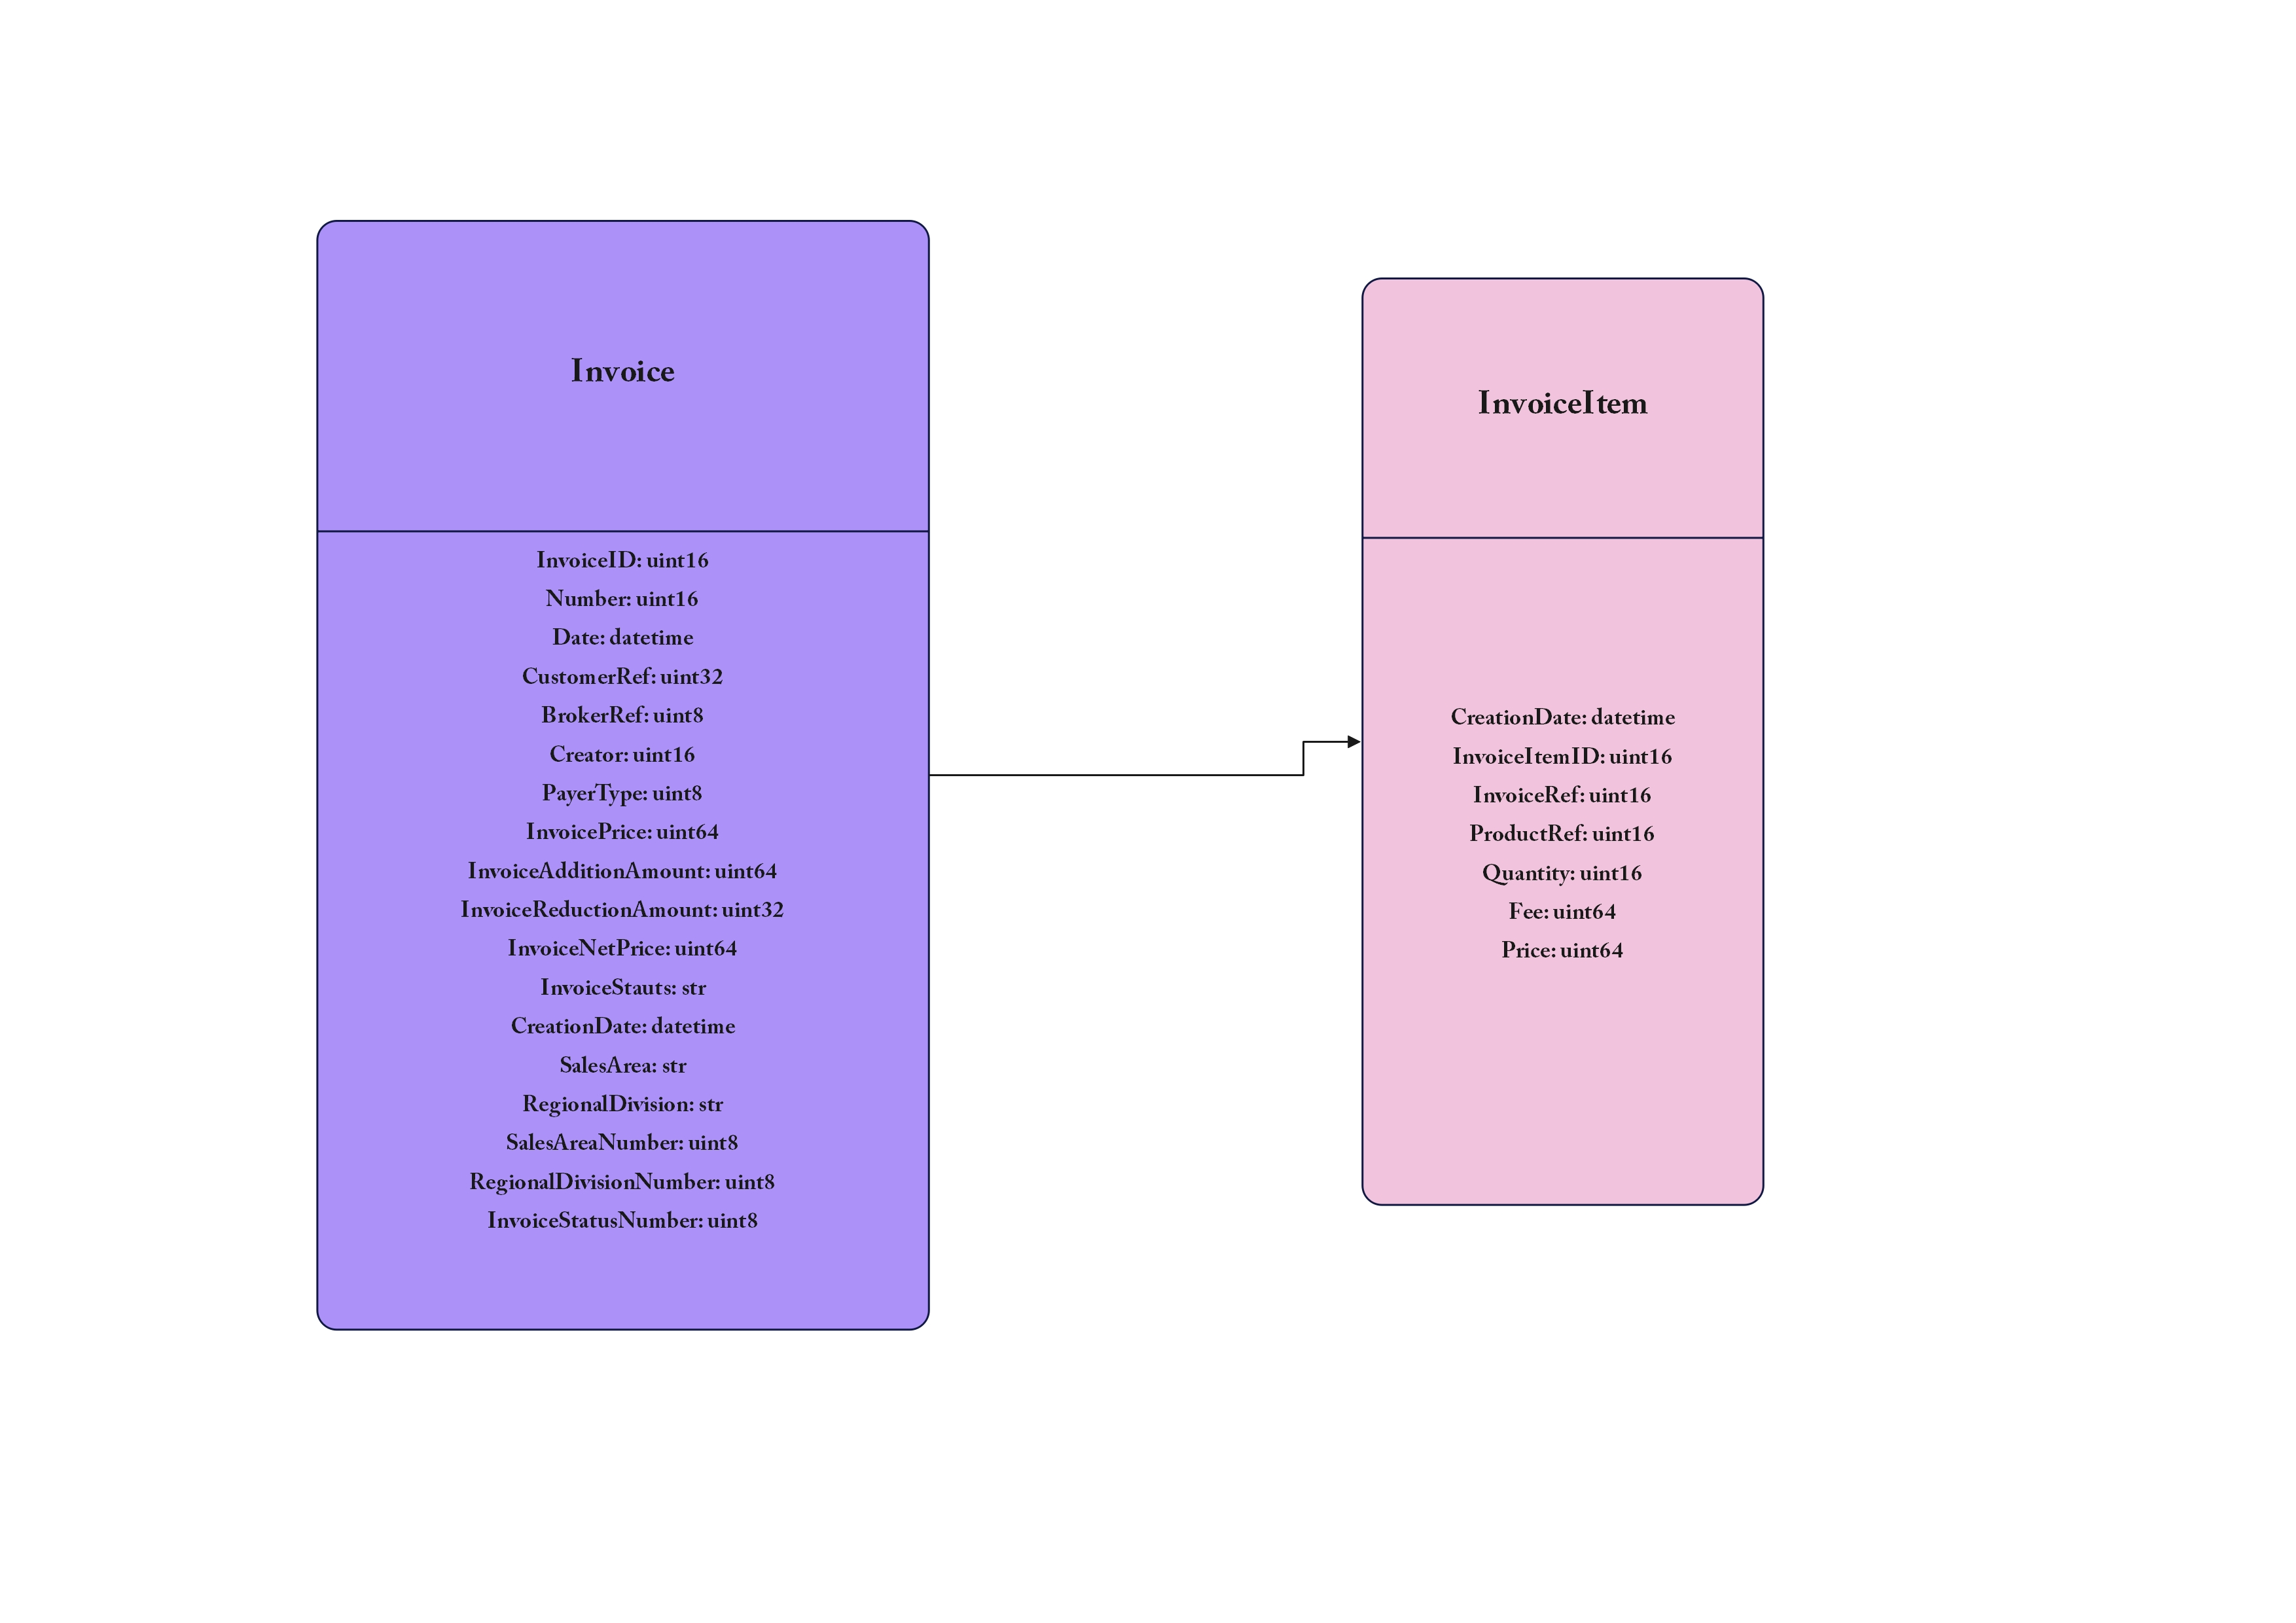

In [161]:
from IPython.display import Image
Image(filename='UML.jpg')


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>تبدیل فاکتور و اقلام آن به دیتافریم های جداگانه</strong>
</div>

In [162]:
invoice_columns = [
    'InvoiceID',
    'Number',
    'Date',
    'CustomerRef',
    'BrokerRef',
    'Creator',
    'PayerType',
    'InvoicePrice',
    'InvoiceAdditionAmount',
    'InvoiceReductionAmount',
    'InvoiceNetPrice',
    'InvoiceStauts',
    'CreationDate',
    'SalesArea',
    'RegionalDivision',
    'SalesAreaNumber',
    'RegionalDivisionNumber',
    'InvoiceStatusNumber'
]

df_invoice = df[invoice_columns].drop_duplicates(subset='InvoiceID')

invoice_item_columns = [
    'InvoiceItemID',
    'InvoiceRef',   
    'ProductRef',
    'Quantity',
    'Fee',
    'Price',
    'CreationDate'
]

df_invoice_items = df[invoice_item_columns]

print(df_invoice,df_invoice_items)





       InvoiceID  Number       Date  CustomerRef  BrokerRef  Creator  \
0             62   26155 2022-02-06            5          1     8959   
2             64   26169 2022-03-02        18806          3     8947   
4             67   26167 2022-02-22        13704          3     8947   
8             74   26170 2022-03-02          128          4     8974   
18            75   26171 2022-03-05           21          1     8959   
...          ...     ...        ...          ...        ...      ...   
17066       5166   27956 2025-03-17        94405         12     9012   
17072       5167   27957 2025-03-17        14277          1     8959   
17076       5168   27958 2025-03-17        15205          1     8959   
17086       5171   27960 2025-03-17        16039          4     8974   
17090       5173   13050 2025-03-11          574          1     9081   

       PayerType  InvoicePrice  InvoiceAdditionAmount  InvoiceReductionAmount  \
0              1      95000000                8550000 

In [163]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# numeric_cols = df.select_dtypes(include=['number']).columns
# filtered_df = df[numeric_cols].loc[:, df[numeric_cols].nunique() > 1]
# corr = filtered_df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>جمع فروش براساس ماه و سال</strong>
</div>

In [177]:
import jdatetime
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import shapiro

def reshape_fa(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


def to_jalali(date):
    return jdatetime.datetime.fromgregorian(datetime=date).strftime('%Y/%m/%d')

df_invoice['Date_Jalali'] = df_invoice['Date'].apply(to_jalali)
df_invoice['Month_Jalali'] = df_invoice['Date_Jalali'].str[:7] 
df_invoice['Year_Jalali'] = df_invoice['Date_Jalali'].str[:4]


monthly_sales = df_invoice.groupby(df_invoice['Month_Jalali'])['InvoiceNetPrice'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales.columns = ['Month', 'TotalSales']
monthly_sales = monthly_sales.sort_values('Month')
print('جمع فروش هر ماه:')
print(monthly_sales)
monthly_sales.to_excel('monthly_sales_jalali.xlsx', index=False)


print('*' * 50)

stat, p = shapiro(monthly_sales['TotalSales'].values)
print(f'Shapiro-Wilk Test: Statistics={stat}, p={p}')
if p > 0.05:
    print("توزیع نرمال است")
else:
    print("توزیع نرمال نیست")


print('*' * 50)

annual_sales = df_invoice.groupby(df_invoice['Year_Jalali'])['InvoiceNetPrice'].sum()
annual_sales = annual_sales.reset_index()
annual_sales.columns = ['Year', 'TotalSales']
print('جمع فروش هر سال:')
print(annual_sales)

monthly_sales.to_excel('annual_sales_jalali.xlsx', index=False)







جمع فروش هر ماه:
      Month     TotalSales
0   1400/11    86418906000
1   1400/12   472676562967
2   1401/01   221527146848
3   1401/02   374716276719
4   1401/03   345000914000
5   1401/04   338374128200
6   1401/05   112800688300
7   1401/06    98994799073
8   1401/07   198882032200
9   1401/08    48567747659
10  1401/09   126492533761
11  1401/10   156953692156
12  1401/11   596768100649
13  1401/12   257529377647
14  1402/01     1674240000
15  1402/02   193653504590
16  1402/03   186435350071
17  1402/04   343139695774
18  1402/05   213725790630
19  1402/06   215402698950
20  1402/07   160253854650
21  1402/08   430993103094
22  1402/09   137056933213
23  1402/10   217959322121
24  1402/11   176349551323
25  1402/12  1491351024819
26  1403/01    33694320000
27  1403/02    58872980720
28  1403/03   161987590483
29  1403/04   528282479570
30  1403/05   114551054188
31  1403/06   388146024505
32  1403/07  2861938031805
33  1403/08   928059379391
34  1403/09    56566986324
35  1403/10

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش کلی در هر سال بر اساس ماه</strong>
</div>

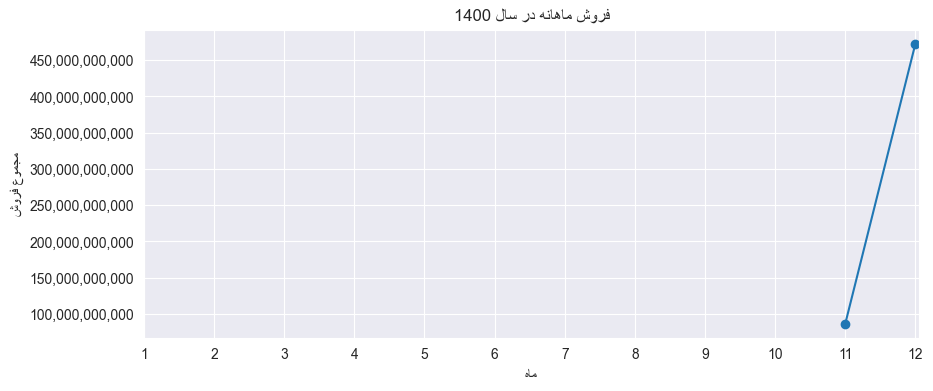

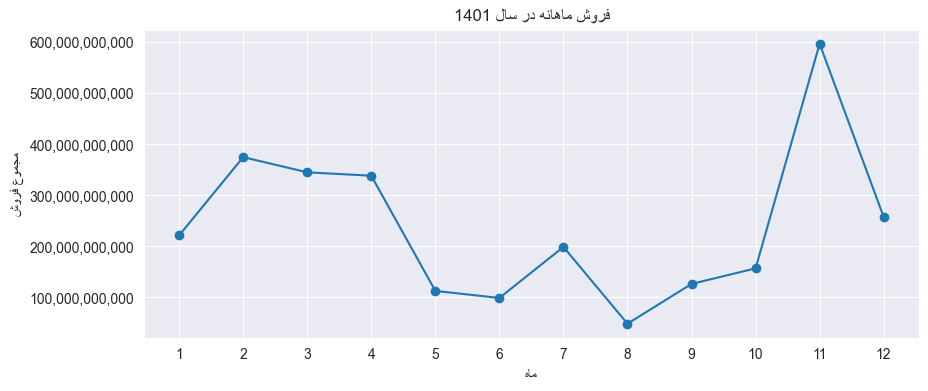

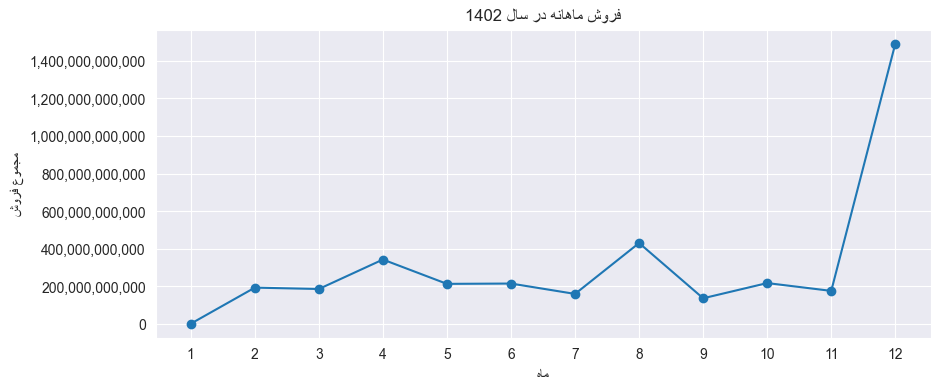

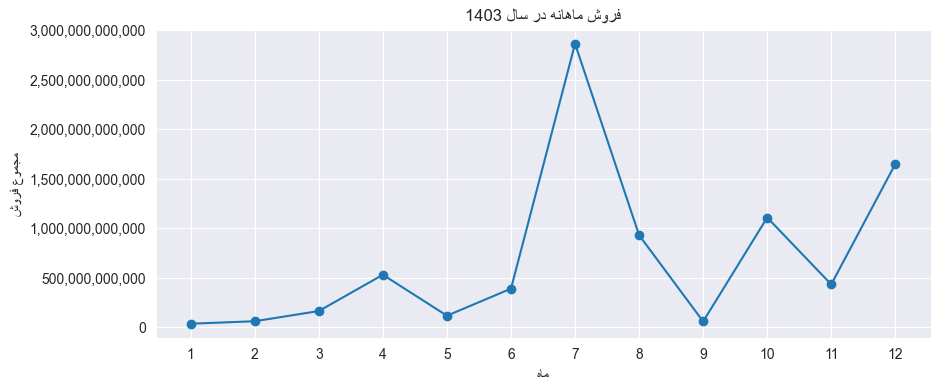

In [165]:
df_invoice['Month_Jalali_Num'] = df_invoice['Date_Jalali'].str[5:7].astype(int)
monthly_yearly_sales = df_invoice.groupby(['Year_Jalali', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()


years = monthly_yearly_sales['Year_Jalali'].unique()

for year in years:
    yearly_data = monthly_yearly_sales[monthly_yearly_sales['Year_Jalali'] == year]
    yearly_data = yearly_data.sort_values('Month_Jalali_Num')
    
 
    yearly_data_plot = yearly_data.set_index('Month_Jalali_Num')
    
    ax = yearly_data_plot['InvoiceNetPrice'].plot(kind='line', marker='o', figsize=(10, 4))
    plt.title(reshape_fa(f'فروش ماهانه در سال {year}'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel(reshape_fa('ماه'))
    ax.set_ylabel(reshape_fa('مجموع فروش'))
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    plt.show()


In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

grouped = df_invoice.groupby(['Year_Jalali', 'SalesArea', 'Month_Jalali_Num'])['InvoiceNetPrice'].sum().reset_index()
grouped.columns = ['Year', 'SalesArea', 'Month', 'TotalSales']

years = grouped['Year'].unique()
sales_areas = grouped['SalesArea'].unique()


# 
# # مرحله 2: حلقه برای هر حوزه فروش
# for area in sales_areas:
#     data_area = grouped[grouped['SalesArea'] == area].sort_values('Month')
# 
#     if data_area['Month'].nunique() < 12:
#         print(f'❌ داده کافی برای پیش‌بینی حوزه "{area}" وجود ندارد.')
#         continue
# 
#     monthly_avg = data_area.set_index('Month')['TotalSales']
# 
#     # مدل SARIMA
#     model = SARIMAX(monthly_avg, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
#     results = model.fit(disp=False)
# 
#     forecast = results.get_forecast(steps=12)
#     predicted = forecast.predicted_mean
#     conf_int = forecast.conf_int()
# 
#     # ترسیم نمودار
#     plt.figure(figsize=(12, 6))
#     plt.plot(monthly_avg.index, monthly_avg.values, marker='o', label='فروش واقعی')
#     plt.plot(range(13, 25), predicted.values, marker='o', linestyle='--', color='orange', label='پیش‌بینی ۱۲ ماه آینده')
#     plt.fill_between(
#         range(13, 25),
#         conf_int.iloc[:, 0].values,
#         conf_int.iloc[:, 1].values,
#         color='orange', alpha=0.2, label='بازه اطمینان'
#     )
# 
#     plt.title(f'پیش‌بینی فروش برای حوزه "{area}"', fontsize=14)
#     plt.xlabel('ماه شمسی (عددی)')
#     plt.ylabel('میانگین فروش')
#     plt.xticks(ticks=list(range(1, 25)), labels=[*range(1, 13), *range(1, 13)])
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه در هر سال بر اساس حوزه فروش</strong>
</div>

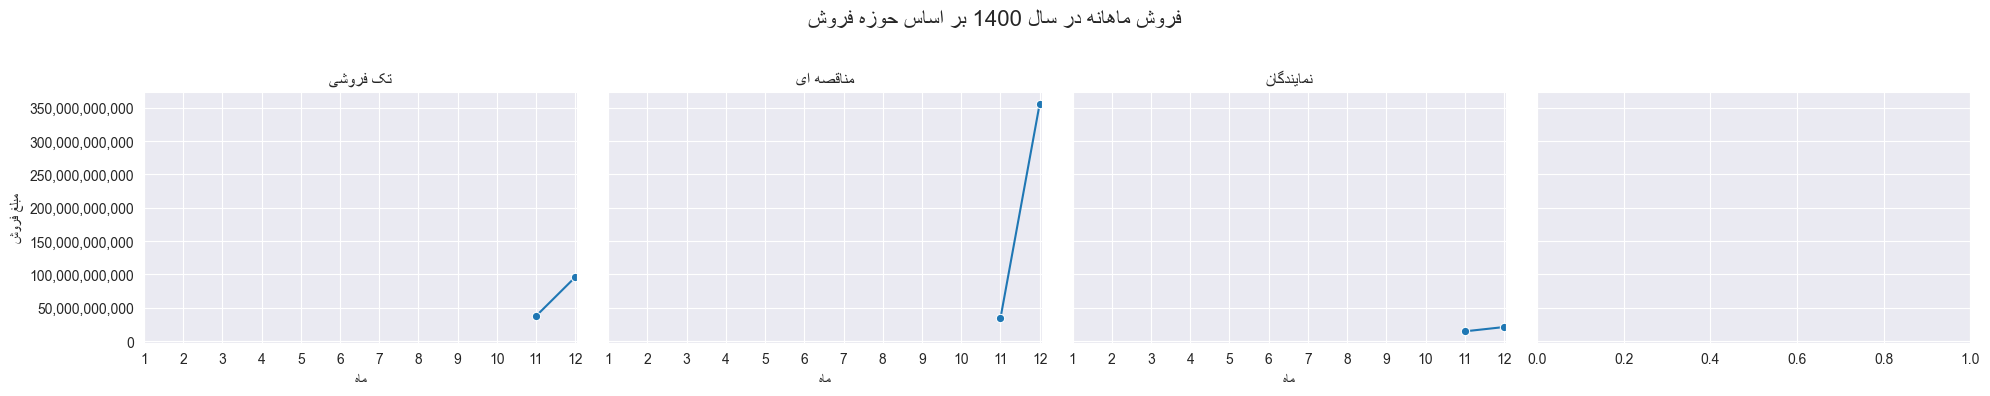

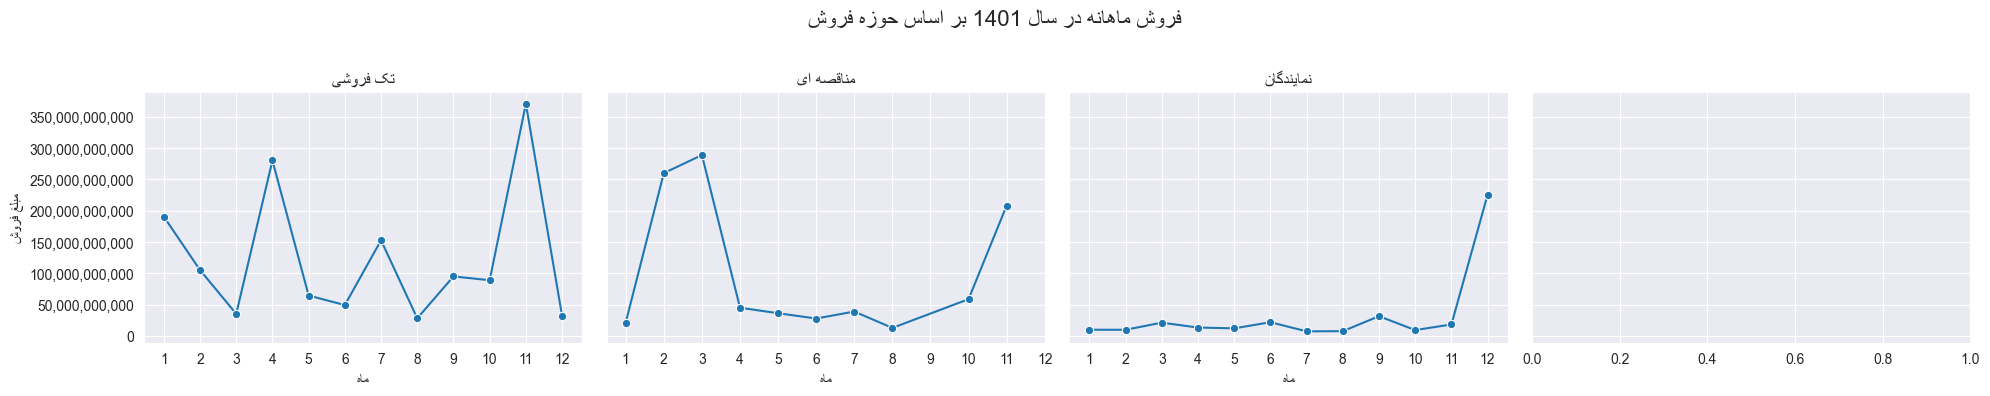

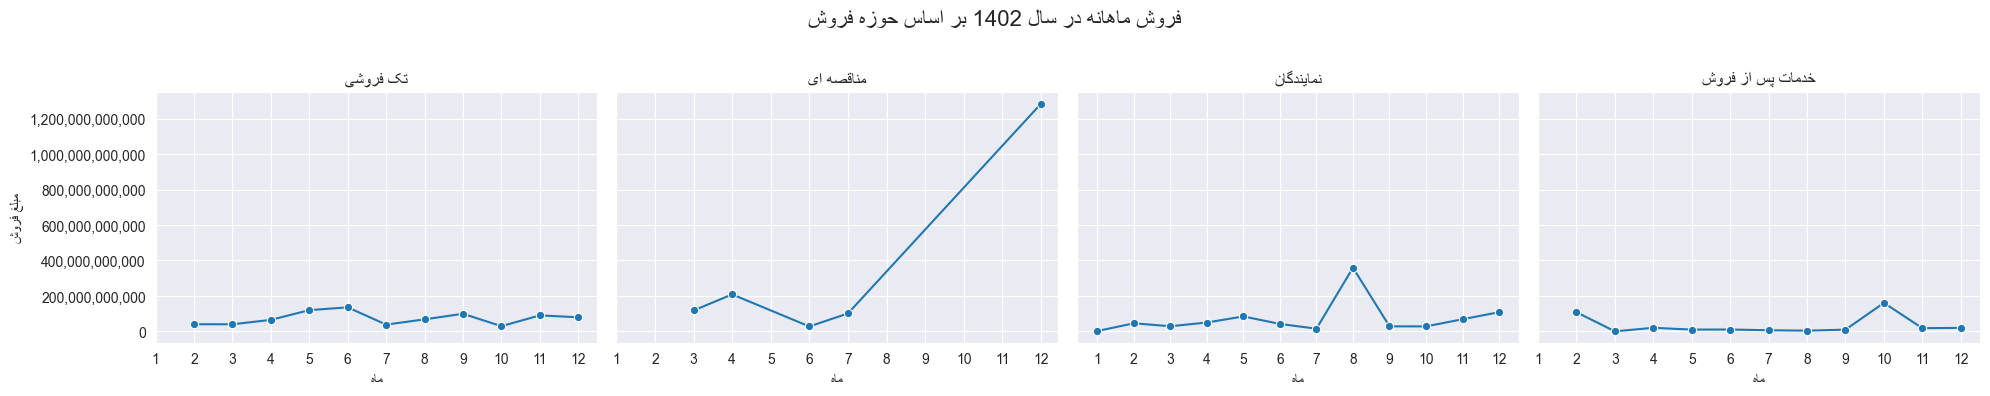

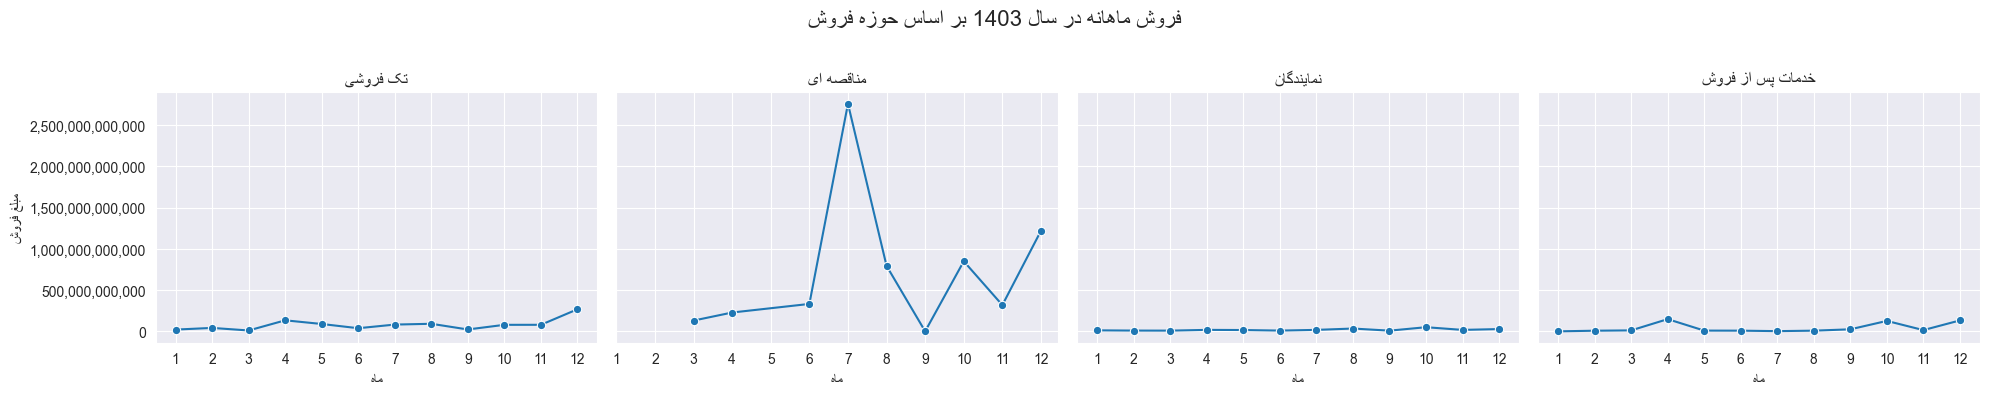

In [189]:
for year in years:
    data_year = grouped[grouped['Year'] == year]
    num_areas = len(sales_areas)
    
    fig, axes = plt.subplots(1, num_areas, figsize=(5 * num_areas, 4), sharey=True)
    fig.suptitle(reshape_fa(f'فروش ماهانه در سال {year} بر اساس حوزه فروش'), fontsize=16)

    if num_areas == 1:
        axes = [axes]

    for idx, area in enumerate(sales_areas):
        data = data_year[data_year['SalesArea'] == area]
        if data.empty:
            continue

        data = data.sort_values('Month')
        sns.lineplot(ax=axes[idx], data=data, x='Month', y='TotalSales', marker='o')
        axes[idx].set_title(reshape_fa(area), fontsize=12)
        axes[idx].set_xlabel(reshape_fa('ماه'))
        if idx == 0:
            axes[idx].set_ylabel(reshape_fa('مبلغ فروش'))
        else:
            axes[idx].set_ylabel('')
        axes[idx].set_xticks(range(1, 13))
        axes[idx].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
        axes[idx].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

<div style="direction: rtl; text-align: right;">
<ul>
  <li> طبق این نمودار در سال 1403 در تیرماه به علت اینکه دمای هوا بیشتر بوده و قظعی برق هم به طبع بیشتر بوده فروش نسبت به ماه های قبل افزایش داشته </li>
  <li>همچنین در سال 403 بیشترین فروش مربوط به حوزه مناقصه ای بوده است که در مهرماه اتفاق افتاده است.</li>
  <li>چون حوزه خدمات پس از فروش یکحوزه کاملا جداگانه است پس به طور دقیق نمی توان آن را با حوزه های دیگر مقایسه کرد و باید مقایسه جداگانه باشد                                                                                                                                        .</li>
  <li>در حال رشد ملایم است.علت اینکه حوزه خدمات پس از فروش درسال های 1400و1401 فروش نداشته عدم راه اندازی خدمات پس از فروش در سیستم است.</li>
  <li>سیستم فروش در انتهای سال 1400 راه اندازی شده است .</li>
  <li>طبق نمودار در انتهای سال 403 فروش افزایش چشم گیری داشته است و بیشترین مقدار فروش برای مناقصه می باشد . </li>
  <li>نمایندگان بیشتر در سال ۱۴۰۲ فعال بوده‌اند (پیک در ماه ۸).</li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
</ul>
</div>

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>بیشترین فروش در هر ماه و مشتری مربوط به آن</strong>
</div>

In [168]:

df_invoice['SalesArea'] = df_invoice['SalesArea']
grouped_Customer = df_invoice.groupby(['Month_Jalali', 'SalesArea', 'CustomerRef'])['InvoiceNetPrice'].sum().reset_index()

# پیدا کردن ایندکس بیشترین فروش برای هر (ماه، حوزه فروش)
idx = grouped_Customer.groupby(['Month_Jalali', 'SalesArea'])['InvoiceNetPrice'].idxmax()

# انتخاب رکوردها با بیشترین فروش
top_customers_by_area_month = grouped_Customer.loc[idx].reset_index(drop=True)

print(top_customers_by_area_month)
top_customers_by_area_month.to_excel('top_customers_by_area_month.xlsx', index=False)


    Month_Jalali         SalesArea  CustomerRef  InvoiceNetPrice
0        1400/11          تک فروشی        13015      17404684000
1        1400/11         مناقصه ای        13832      34228725000
2        1400/11         نمایندگان            3       4643945000
3        1400/12          تک فروشی          128      28541432000
4        1400/12         مناقصه ای        18928     355720652967
..           ...               ...          ...              ...
119      1403/11         نمایندگان        20636       7664855000
120      1403/12          تک فروشی        94405     201463900001
121      1403/12  خدمات پس از فروش        13228     119625000000
122      1403/12         مناقصه ای        18806    1199863500000
123      1403/12         نمایندگان        15205       6545550000

[124 rows x 4 columns]






<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه</strong>
</div>



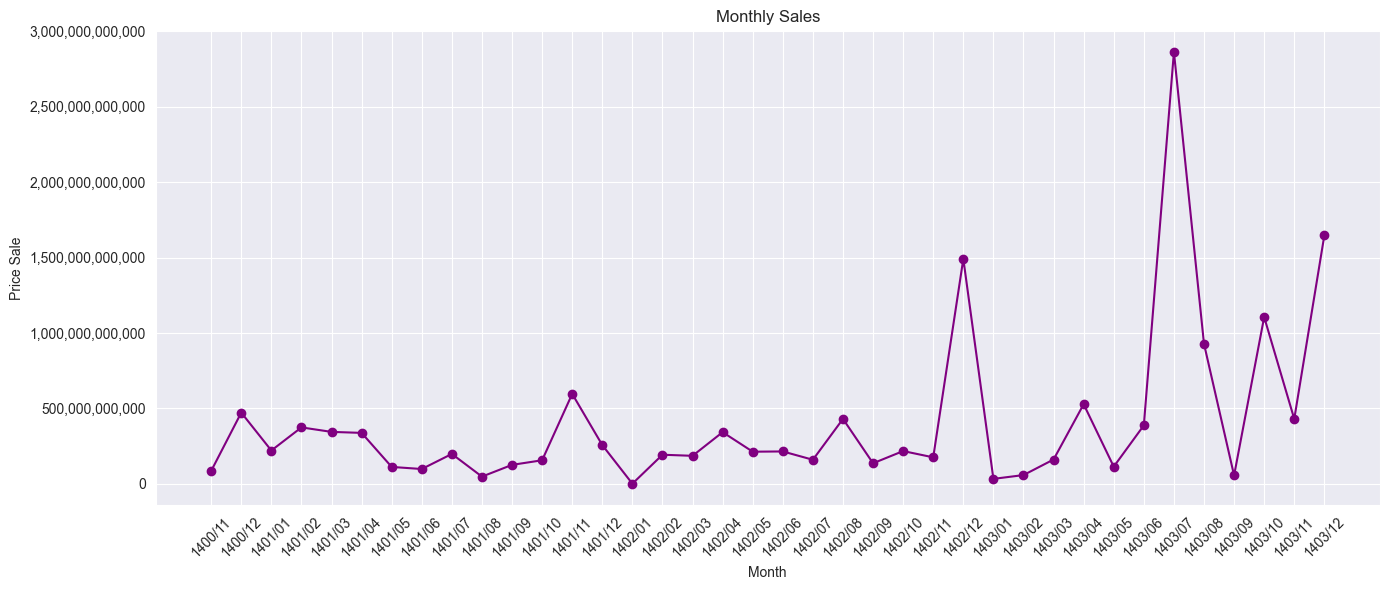

In [57]:


plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Price Sale')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه</strong>
</div>


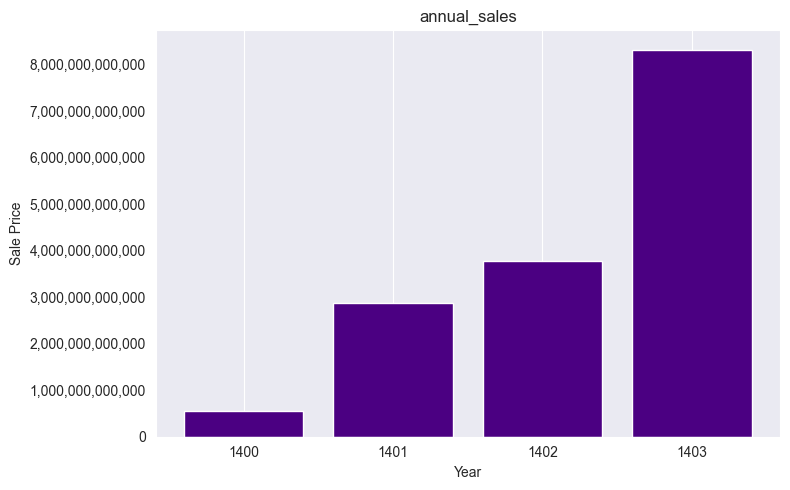

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(annual_sales['Year'], annual_sales['TotalSales'], color='indigo')
plt.title('annual_sales')
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong> نمودار فروش ماهانه بر اساس حوزه فروش</strong>
</div>


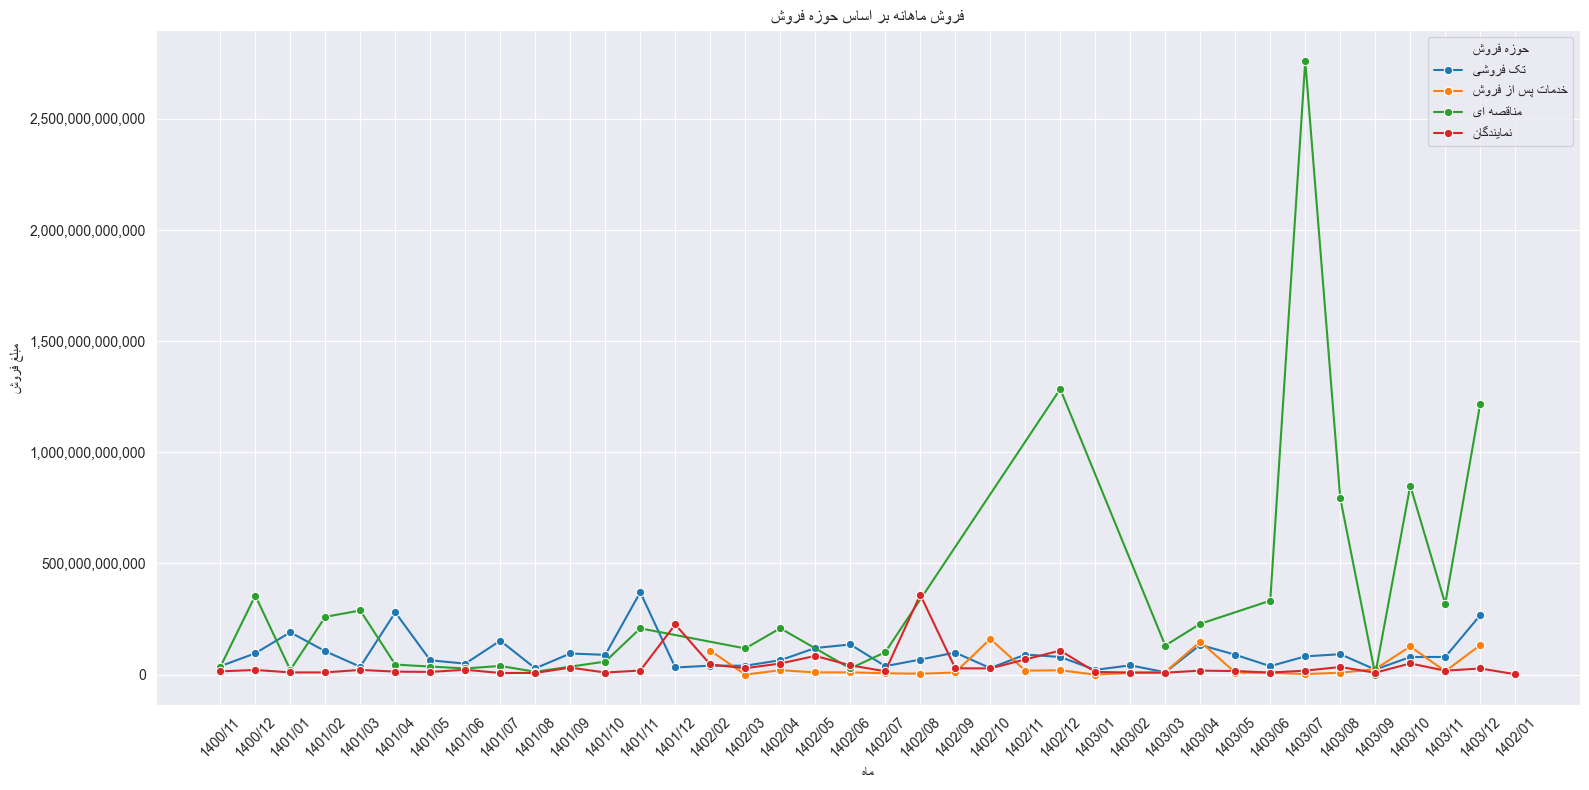

In [86]:


monthly_sales_area = df_invoice.groupby(['SalesArea', 'Month_Jalali'])['InvoiceNetPrice'].sum().reset_index()
monthly_sales_area['SalesArea'] = monthly_sales_area['SalesArea'].apply(reshape_fa)
monthly_sales_area.columns = ['SalesArea', 'Month', 'TotalSales']
plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales_area, x='Month', y='TotalSales', hue='SalesArea', marker='o')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('فروش ماهانه بر اساس حوزه فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'))
plt.tight_layout()
plt.show()






<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نودار فروش ماهانه بر اساس خدمات پس از فروش</strong>
</div>


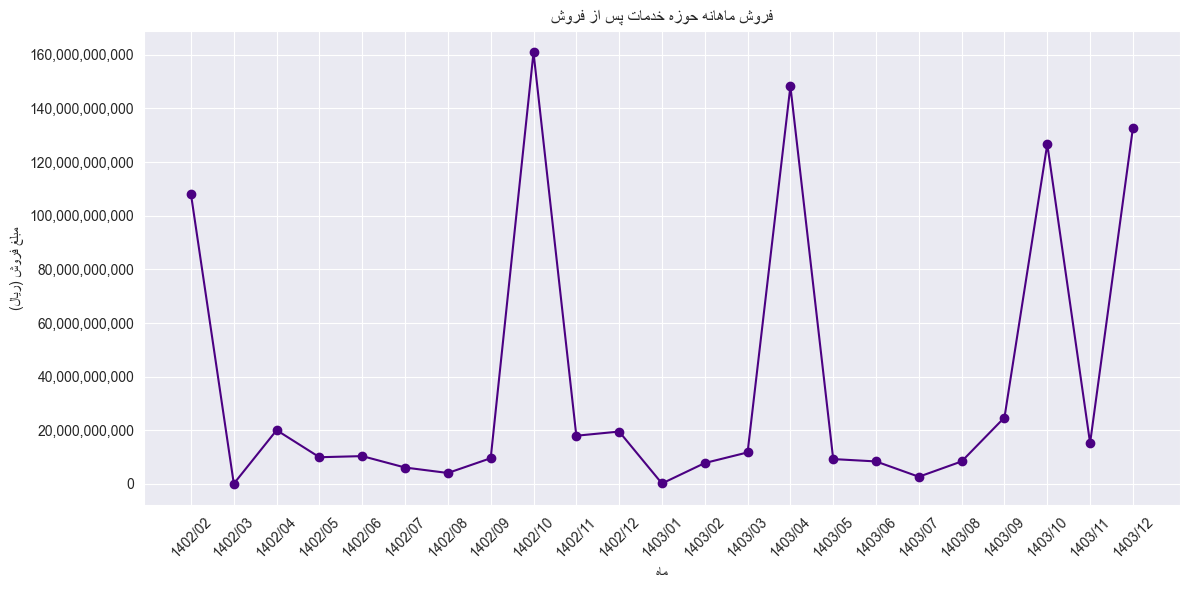

In [87]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] == reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(12,6))
plt.plot(df_service_after_sales_monthly['Month'], df_service_after_sales_monthly['TotalSales'], marker='o', color='indigo')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title(reshape_fa('فروش ماهانه حوزه خدمات پس از فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش (ریال)'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<div style="direction: rtl; text-align: right;">
<ul>
  <li>انحراف معیار بالا یعنی فروش ماهانه نوسان داره</li>
</ul>
</div>


In [88]:
data = df_service_after_sales_monthly['TotalSales']

mean_val = data.mean()
median_val = data.median()
std_dev_val = data.std()
skewness_val = skew(data)
kurtosis_val = kurtosis(data)

print(f"میانگین: {mean_val:,.0f}")
print(f"میانه: {median_val:,.0f}")
print(f"انحراف معیار: {std_dev_val:,.0f}")
print(f"چولگی (skewness): {skewness_val:.2f}")
print(f"کشیدگی (kurtosis): {kurtosis_val:.2f}")

میانگین: 37,458,680,810
میانه: 10,335,385,450
انحراف معیار: 53,731,726,949
چولگی (skewness): 1.42
کشیدگی (kurtosis): 0.22


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش ماهانه به جز خدمات پس از فروش</strong>
</div>


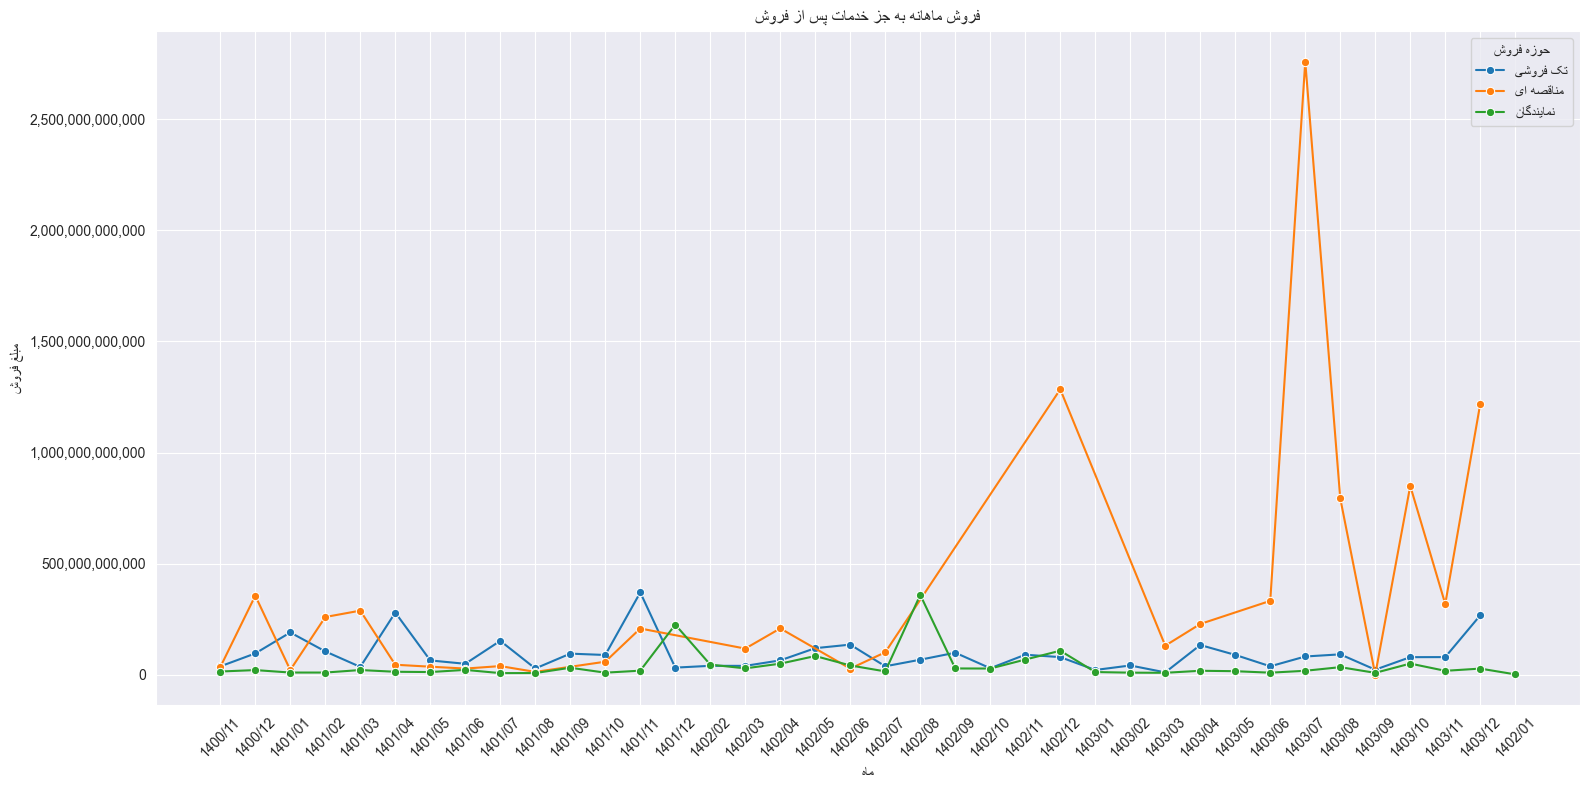

In [61]:
df_service_after_sales_monthly = monthly_sales_area[monthly_sales_area['SalesArea'] != reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df_service_after_sales_monthly,
    x='Month',
    y='TotalSales',
    hue='SalesArea',
    marker='o'
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.title(reshape_fa('فروش ماهانه به جز خدمات پس از فروش'))
plt.xlabel(reshape_fa('ماه'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'), loc='best')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه بر اساس حوزه فروش</strong>
</div>

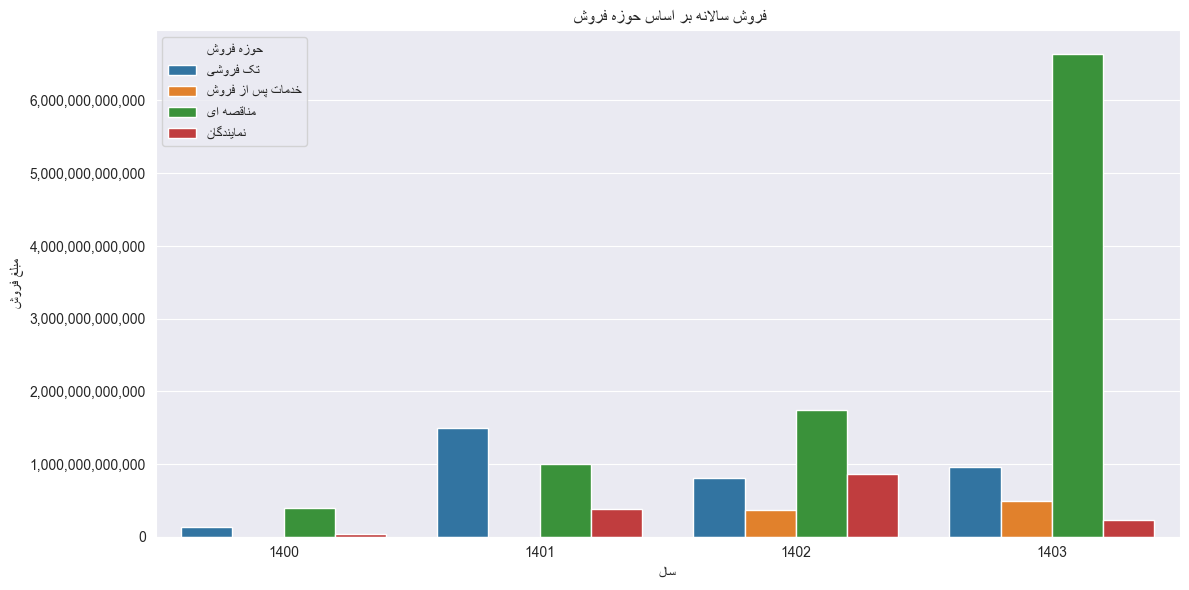

In [62]:
annual_sales_area = df_invoice.groupby(['SalesArea', 'Year_Jalali'])['InvoiceNetPrice'].sum().reset_index()
annual_sales_area['SalesArea'] = annual_sales_area['SalesArea'].apply(reshape_fa)
annual_sales_area.columns = ['SalesArea', 'Year', 'TotalSales']

plt.figure(figsize=(12, 6))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=annual_sales_area, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه بر اساس حوزه فروش '))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))
plt.legend(title=reshape_fa('حوزه فروش'), loc='best')
plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه به جز خدمات پس از فروش</strong>
</div>

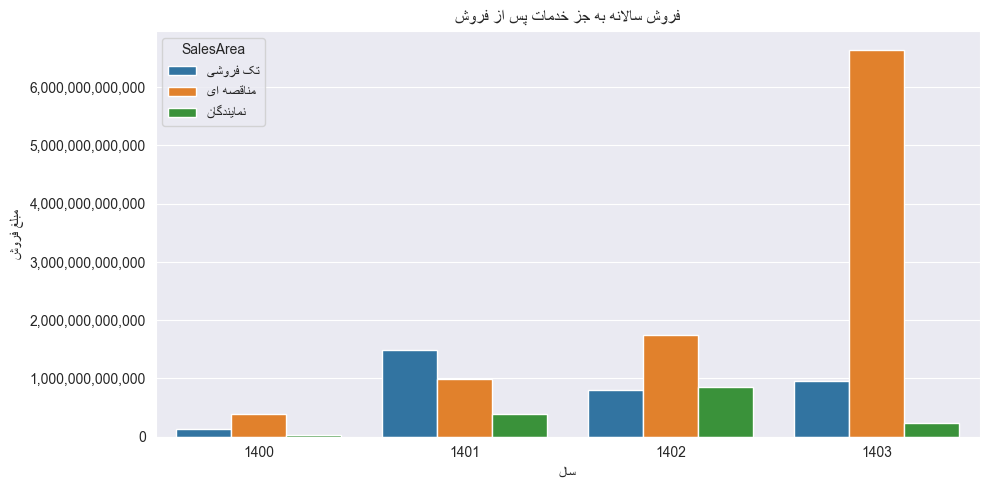

In [63]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] != reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه به جز خدمات پس از فروش'))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))

plt.tight_layout()
plt.show()


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>نمودار فروش سالانه خدمات پس از فروش</strong>
</div>

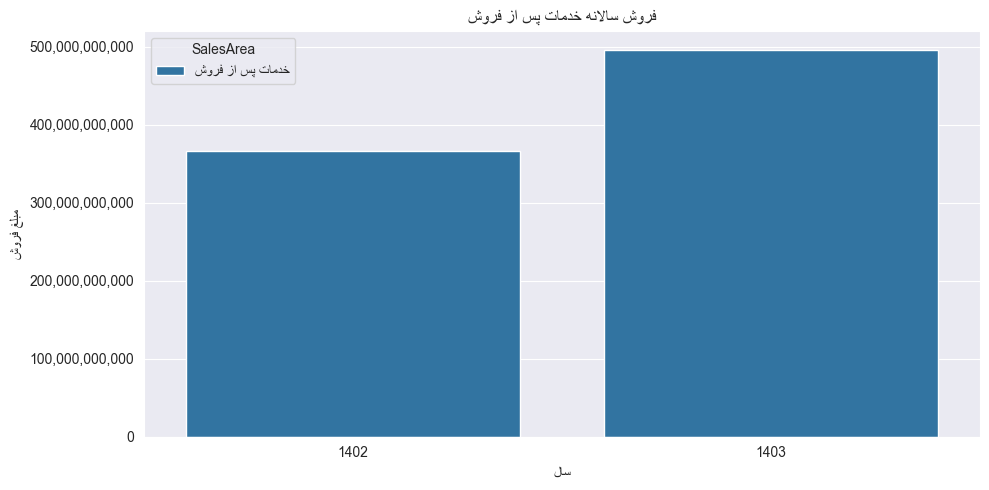

In [64]:
df_service_after_sales_annual = annual_sales_area[annual_sales_area['SalesArea'] == reshape_fa('خدمات پس از فروش')]
plt.figure(figsize=(10,5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(data=df_service_after_sales_annual, x='Year', y='TotalSales', hue='SalesArea')
plt.title(reshape_fa('فروش سالانه خدمات پس از فروش'))
plt.xlabel(reshape_fa('سال'))
plt.ylabel(reshape_fa('مبلغ فروش'))

plt.tight_layout()
plt.show()

<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>میانگین خرید هر مشتری</strong>
</div>

In [65]:


avg_payment_per_customer = df_invoice.groupby('CustomerRef')['InvoiceNetPrice'].mean().reset_index()
avg_payment_per_customer.columns = ['CustomerRef', 'AverageInvoiceNetPrice']
print( avg_payment_per_customer.loc[avg_payment_per_customer['AverageInvoiceNetPrice'].idxmax()])
avg_payment_per_customer.to_excel('avg_payment_per_customer.xlsx',index=False)


CustomerRef               1.790900e+04
AverageInvoiceNetPrice    2.952532e+11
Name: 241, dtype: float64


<div align="center" style="font-size: 30px; font-weight: bold;">
  <strong>تعیین درصد مشتریان وفادار</strong>
</div>

     CustomerRef  InvoiceCount
0              3            23
1              4             1
2              5             1
3              6             1
4             21             1
..           ...           ...
761        94393             1
762        94399             1
763        94405             2
764        94407             1
765        94414             1

[766 rows x 2 columns]
تعداد کل مشتریان: 766
تعداد مشتریان وفادار: 365 (47.65%)
تعداد مشتریان جدید: 401 (52.35%)


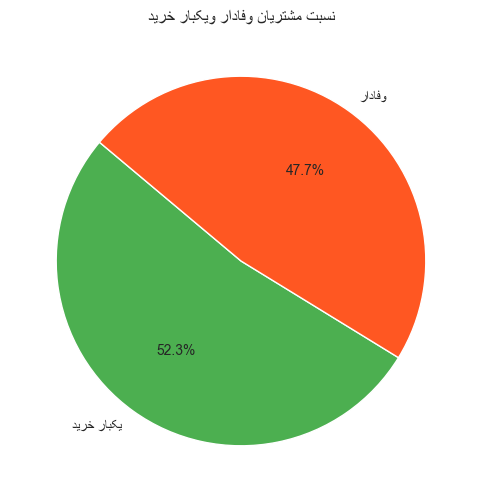

In [66]:
#  تعداد فاکتورهای هر مشتری
customer_purchase_counts = df_invoice.groupby('CustomerRef').size().reset_index(name='InvoiceCount')
print(customer_purchase_counts)

#  تعیین نوع مشتری بر اساس تعداد فاکتور
customer_purchase_counts['CustomerType'] = customer_purchase_counts['InvoiceCount'].apply(
lambda x: 'وفادار' if x > 1 else 'یکبار خرید'
)

#  تعداد مشتریان کل، وفادار و جدید
total_customers = customer_purchase_counts.shape[0]
loyal_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == 'وفادار'].shape[0]
new_customers = customer_purchase_counts[customer_purchase_counts['CustomerType'] == 'یکبار خرید'].shape[0]
customer_purchase_counts['CustomerType'] = customer_purchase_counts['CustomerType'].apply(reshape_fa)

percent_loyal = (loyal_customers / total_customers) * 100
percent_new = (new_customers / total_customers) * 100

print(f"تعداد کل مشتریان: {total_customers}")
print(f"تعداد مشتریان وفادار: {loyal_customers} ({percent_loyal:.2f}%)")
print(f"تعداد مشتریان جدید: {new_customers} ({percent_new:.2f}%)")

counts = customer_purchase_counts['CustomerType'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#4CAF50', '#FF5722'], startangle=140)
plt.title(reshape_fa('نسبت مشتریان وفادار ویکبار خرید'))
plt.show()



In [67]:
loyal_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('وفادار')]['CustomerRef']
new_customers_list = customer_purchase_counts[customer_purchase_counts['CustomerType'] == reshape_fa('یکبار خرید')]['CustomerRef']

print("لیست نمونه مشتریان وفادار:")
print(loyal_customers_list.head())

print("\nلیست نمونه مشتریان یکبار خرید:")
print(new_customers_list.head())


with pd.ExcelWriter('customers_loyal_and_new.xlsx') as writer:
    loyal_customers_list.to_excel(writer, sheet_name='مشتریان وفادار', index=False)
    new_customers_list.to_excel(writer, sheet_name='مشتریان با یکبار خرید', index=False)


لیست نمونه مشتریان وفادار:
0       3
8     128
9     149
10    152
12    225
Name: CustomerRef, dtype: uint32

لیست نمونه مشتریان یکبار خرید:
1     4
2     5
3     6
4    21
5    82
Name: CustomerRef, dtype: uint32


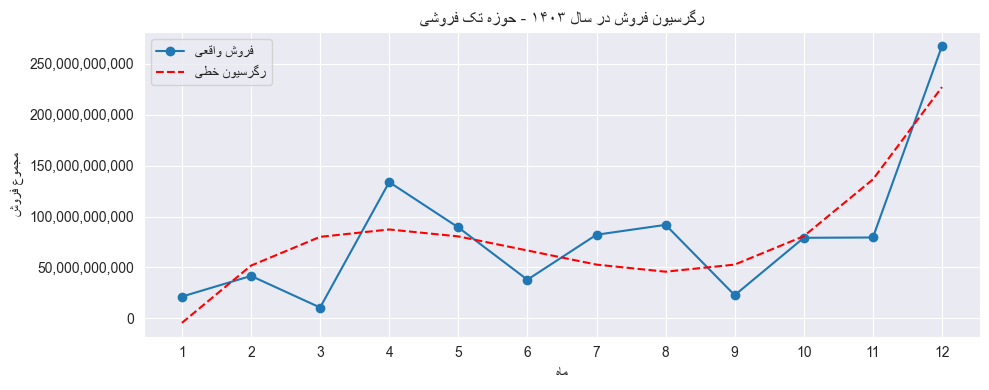

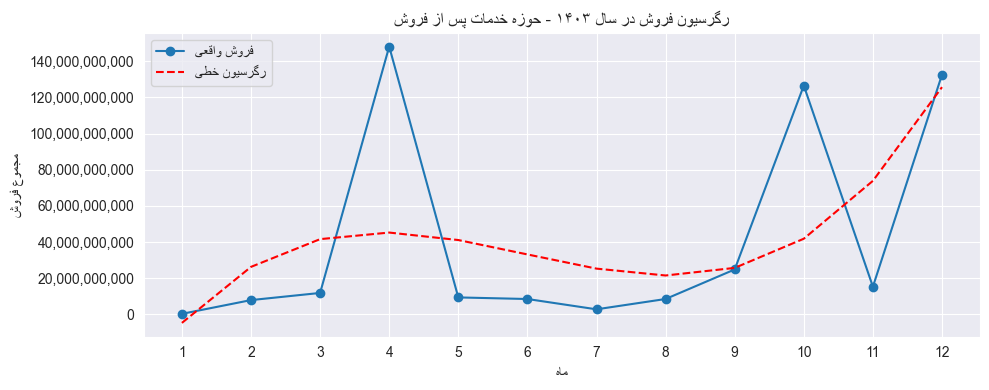

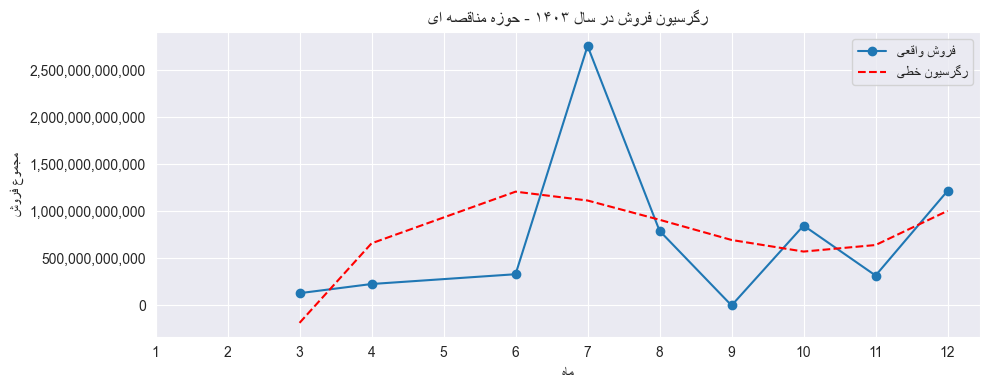

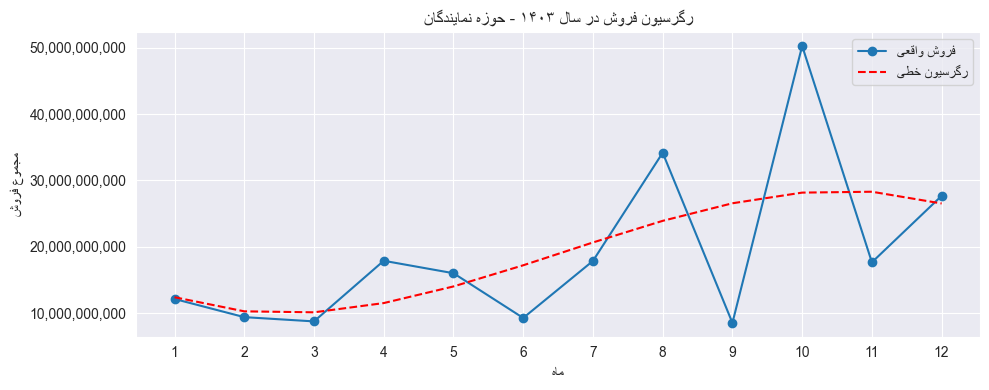

In [210]:


# data_1403 = grouped[grouped['Year'] == '1403']  
# sales_areas_1403 = data_1403[data_1403['SalesArea'] == 'مناقصه ای']
# 
# x = sales_areas_1403['Month']
# y = sales_areas_1403['TotalSales']
# 
# model = np.poly1d(np.polyfit(x, y, 1))  # مدل رگرسیون خطی
# y_pred = model(x)
# 
# plt.figure(figsize=(10, 4))
# plt.plot(x, y, marker='o', label=reshape_fa('فروش واقعی'))
# plt.plot(x, y_pred, 'r--', label=reshape_fa('رگرسیون خطی'))
# 
# plt.xticks(range(1, 13))
# plt.xlabel(reshape_fa('ماه'))
# plt.ylabel(reshape_fa('مجموع فروش'))
# plt.title(reshape_fa('رگرسیون فروش در سال ۱۴۰۳'))
# 
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  
# 
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()
data_1403 = grouped[grouped['Year'] == '1403']  
sales_areas = data_1403['SalesArea'].unique()

# حلقه برای هر حوزه فروش
for area in sales_areas:
    area_data = data_1403[data_1403['SalesArea'] == area]
    
    if len(area_data) < 2:
        continue  # اگر داده کافی نداشت، از این حوزه عبور کن

    x = area_data['Month']
    y = area_data['TotalSales']

    model = np.poly1d(np.polyfit(x, y, 3))
    y_pred = model(x)
    


    # رسم نمودار
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, marker='o', label=reshape_fa('فروش واقعی'))
    plt.plot(x, y_pred, 'r--', label=reshape_fa('رگرسیون خطی'))

    plt.xticks(range(1, 13))
    plt.xlabel(reshape_fa('ماه'))
    plt.ylabel(reshape_fa('مجموع فروش'))
    plt.title(reshape_fa(f'رگرسیون فروش در سال ۱۴۰۳ - حوزه {area}'))

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
   





تک فروشی: بهترین درجه = 5 | MSE = 9.41e+20 | R² = 0.787


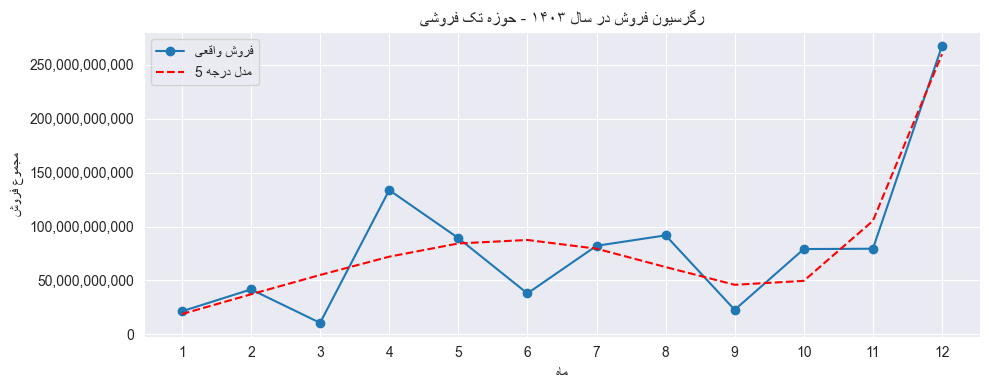


خدمات پس از فروش: بهترین درجه = 5 | MSE = 1.98e+21 | R² = 0.347


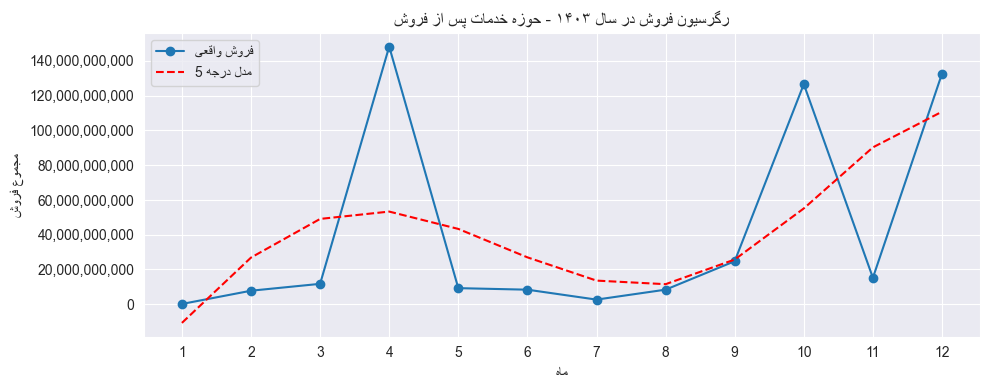


مناقصه ای: بهترین درجه = 5 | MSE = 3.95e+23 | R² = 0.393


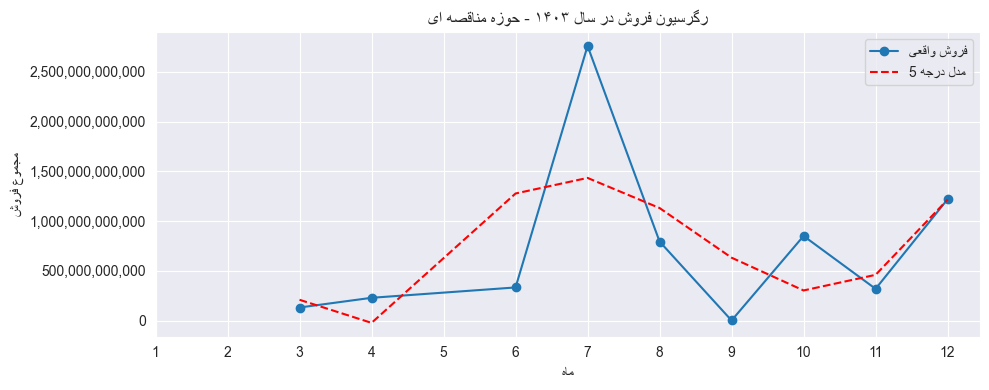


نمایندگان: بهترین درجه = 5 | MSE = 9.46e+19 | R² = 0.349


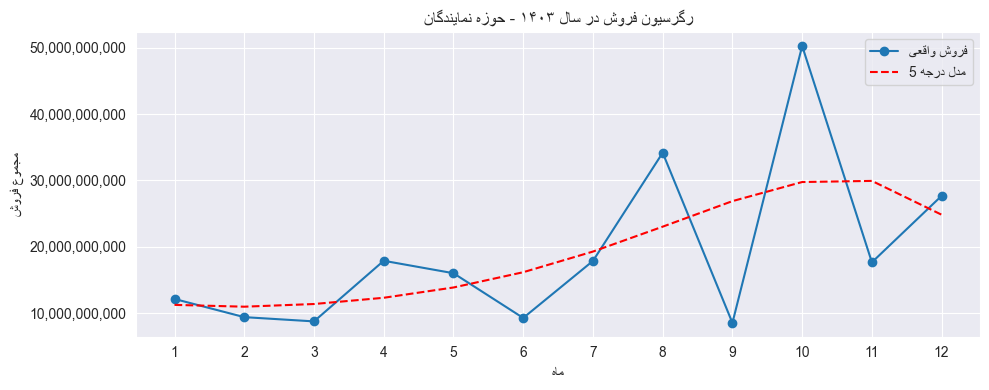

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# فیلتر داده‌ها برای سال ۱۴۰۳
data_1403 = grouped[grouped['Year'] == '1403']

# حلقه برای همه حوزه‌های فروش
sales_areas = data_1403['SalesArea'].unique()

for area in sales_areas:
    area_data = data_1403[data_1403['SalesArea'] == area]
    x = area_data['Month']
    y = area_data['TotalSales']
    
    errors = []
    models = []
    
    # تست درجات مختلف
    for deg in range(1, 6):
        model = np.poly1d(np.polyfit(x, y, deg))
        y_pred = model(x)
        
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        
        errors.append((deg, mse, r2))
        models.append((model, y_pred))

    # پیدا کردن بهترین مدل با کمترین MSE
    best_deg, best_mse, best_r2 = sorted(errors, key=lambda x: x[1])[0]
    best_model, best_y_pred = models[best_deg - 1]

    # چاپ نتایج
    print(f'\n{area}: بهترین درجه = {best_deg} | MSE = {best_mse:.2e} | R² = {best_r2:.3f}')

    # رسم نمودار
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'o-', label=reshape_fa('فروش واقعی'))
    plt.plot(x, best_y_pred, 'r--', label=reshape_fa(f'مدل درجه {best_deg}'))

    plt.title(reshape_fa(f'رگرسیون فروش در سال ۱۴۰۳ - حوزه {area}'))
    plt.xlabel(reshape_fa('ماه'))
    plt.ylabel(reshape_fa('مجموع فروش'))
    plt.xticks(range(1, 13))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



🔹 حوزه: تک فروشی
MSE: 1,449,335,700,641,269,940,224
R²: 0.672


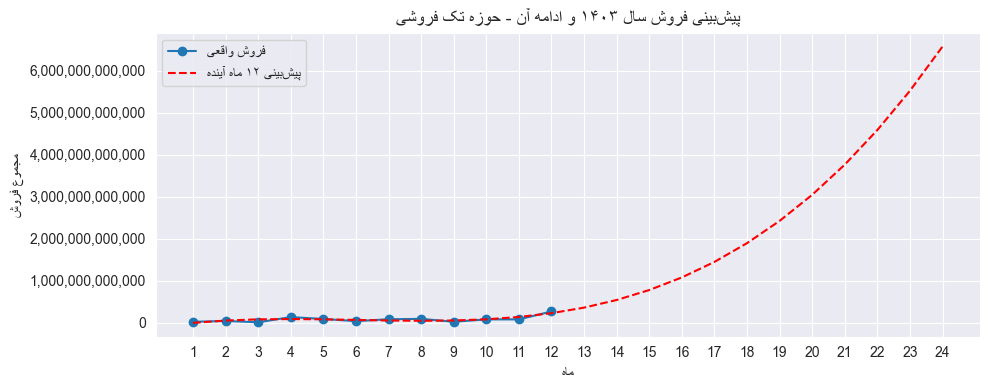


🔹 حوزه: خدمات پس از فروش
MSE: 2,070,768,750,938,301,399,040
R²: 0.317


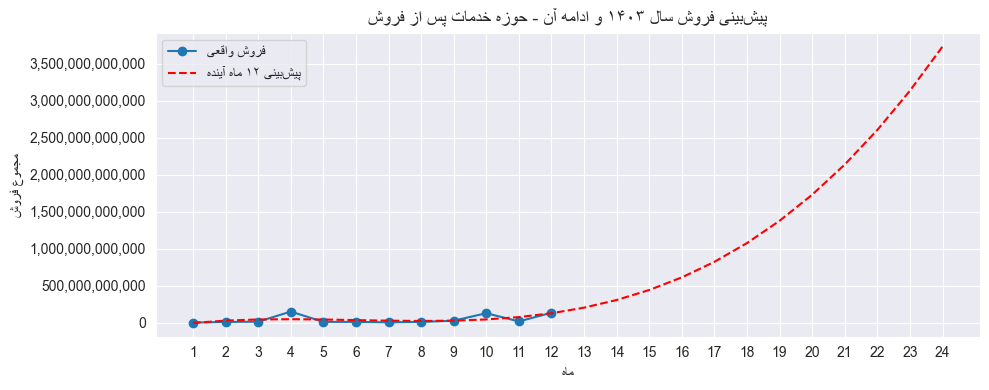


🔹 حوزه: مناقصه ای
MSE: 498,024,635,288,435,826,884,608
R²: 0.233


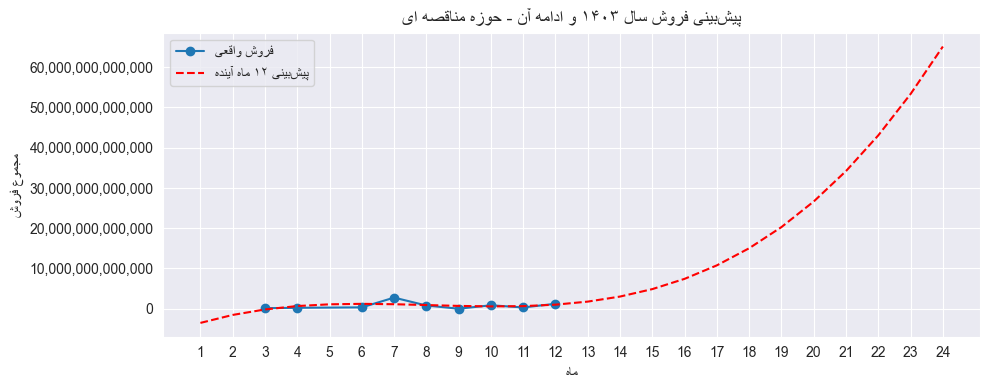


🔹 حوزه: نمایندگان
MSE: 95,881,889,257,018,114,048
R²: 0.340


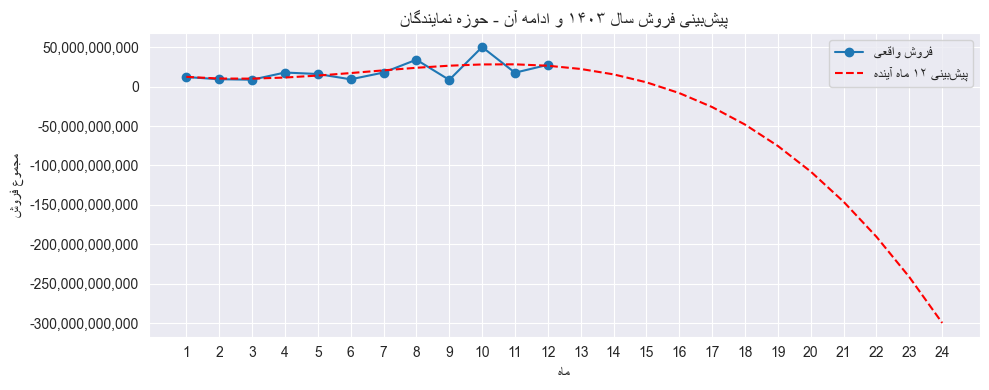

-190659765311.35498


In [213]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# فیلتر فقط داده‌های سال ۱۴۰۳
data_1403 = grouped[grouped['Year'] == '1403']

# لیست حوزه‌های فروش
sales_areas = data_1403['SalesArea'].unique()

for area in sales_areas:
    data_area = data_1403[data_1403['SalesArea'] == area]
    
    x = data_area['Month'].values
    y = data_area['TotalSales'].values

    # مدل رگرسیون چندجمله‌ای درجه 3
    degree = 3
    model = np.poly1d(np.polyfit(x, y, degree))

    # پیش‌بینی روی داده‌های موجود و 12 ماه آینده
    x_future = np.arange(1, 25)  # ماه‌های 1 تا 24
    y_future_pred = model(x_future)

    # ارزیابی مدل روی داده‌های واقعی
    y_pred_train = model(x)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    # رسم نمودار
    plt.figure(figsize=(10, 4))
    plt.plot(x, y, 'o-', label=reshape_fa('فروش واقعی'))
    plt.plot(x_future, y_future_pred, 'r--', label=reshape_fa('پیش‌بینی ۱۲ ماه آینده'))

    plt.title(reshape_fa(f'پیش‌بینی فروش سال ۱۴۰۳ و ادامه آن - حوزه {area}'), fontsize=13)
    plt.xlabel(reshape_fa('ماه'))
    plt.ylabel(reshape_fa('مجموع فروش'))
    plt.xticks(ticks=np.arange(1, 25, 1))
    plt.grid(True)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # چاپ ارزیابی مدل
    print(f'\n🔹 حوزه: {area}')
    print(f'MSE: {mse:,.0f}')
    print(f'R²: {r2:.3f}')
    
    plt.tight_layout()
    plt.show()

